# YOLO Object Detection 

## Step 1: Beginner's Guide to YOLOV1


## Step 2: Prerequisites
 1. Python 3 Installation: Official Python Website :   (https://www.python.org/downloads/)
 2. OpenCV Installation Guide: https://pypi.org/project/opencv-python/
     - The choice of OpenCV version should be driven by your project's specific needs, the requirements of the software environment you're working within, and the benefits of new features and improvements versus the stability and compatibility of older versions.
 4. Install matplotlib : https://matplotlib.org/stable/users/installing/index.html

## Step 3: Download the Pretrained YOLOv1 Model
1. Resource Type: YOLOv1 pretrained weights. (753 MB)
2. Where to Find: http://pjreddie.com/media/files/yolov1/yolov1.weights or
3. Run this command in cmd : !wget http://pjreddie.com/media/files/yolov1/yolov1.weights


In [8]:
!wget https://pjreddie.com/media/files/yolov2.weights


--2024-01-29 17:36:48--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194,49M   294KB/s    in 4m 52s  

2024-01-29 17:41:41 (682 KB/s) - ‘yolov2.weights’ saved [203934260/203934260]



## Step 4: Download and Compile Darknet
After setting up the Python environment and before loading the YOLO model, you should download Darknet:
- What is Darknet ?

![Darknet](https://www.researchgate.net/publication/344870906/figure/fig1/AS:1023682919030784@1621076435024/YOLOv1-algorithm-network-structure-diagram-The-YOLOv1-algorithm-uses-a-convolutional.jpg)



- How to download Darknet : Clone the Darknet Repository:

1. Navigate to the directory where you want to install Darknet in cmd 
2. Use Git to clone the Darknet repository: git clone https://github.com/pjreddie/darknet.git

- How to Compile Darknet:

1. go to the Darknet directory 


2. By default, Darknet uses **GPU** for computation. If you're using a GPU, ensure CUDA is installed on your system. If you're not using a GPU, you'll need to edit the **Makefile** in the Darknet directory to disable GPU and CUDA:
   - Open Makefile in a text editor.
   - Set GPU=0 and CUDNN=0.
   - Compile Darknet by running: make
   - Test Darknet : ./darknet   (This command should output the usage documentation for Darknet, indicating that it's installed correctly.)



In [11]:
!git clone https://github.com/pjreddie/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


## Step 5: Verify Configuration and Class Names Files
Verify Configuration and Class Names Files
1. Check the Darknet cfg Folder:

- Navigate to the cfg directory within your Darknet installation.
- Look for the YOLOv1 configuration file, which might be named something like yolov1.cfg or similar.
If this file is present, you don't need to download it separately.

2. Check the Darknet data Folder:

 - Go to the data directory in your Darknet installation.
 - Look for a file that contains class names, often named something like coco.names, voc.names, or similar.
This file lists the classes that YOLO was trained to detect. For YOLOv1, this will typically be the classes from the PASCAL VOC dataset

## Step 6: Import Necessary Libraries
In the first cell of your notebook, import the required Python libraries:


In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

print(cv2.__version__)



4.9.0


## Step 3: Load the Pretrained YOLO Model
Load the YOLOv1 model using OpenCV. This requires the weight file and the config file you mentioned. If you have already downloaded these while setting up Darknet, you can use them here. Otherwise, you will need to download them as described in previous steps.

In [3]:


weightsPath = "/home/sarah/Desktop/Video/YOLO/code/vem/yolov2.weights"  # Path to the YOLOv2 weights file
configPath = "/home/sarah/Desktop/Video/YOLO/code/vem/darknet/cfg/yolov2.cfg"   # Path to the YOLOv2 configuration file

net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)


## Detection 
Here's a simplified view of what the directory structure might look like:


In [ ]:

Darknet/
├── darknet (executable)
├── cfg/
│   ├── yolov2.cfg
│   └── ...
├── data/
│   ├── dog.jpg
│   └── ...
└── yolov2.weights


In [5]:
# opencv = 0
%cd darknet


/home/sarah/Desktop/Video/YOLO/code/vem/darknet


/home/sarah/Desktop/Video/YOLO/code/vem/myenv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!./darknet detect cfg/yolov2.cfg yolov2.weights data/giraffe.jpg


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 max          2 x 2 / 2   608 x 608 x  32   ->   304 x 304 x  32
    2 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    3 max          2 x 2 / 2   304 x 304 x  64   ->   152 x 152 x  64
    4 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    5 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    6 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    7 max          2 x 2 / 2   152 x 152 x 128   ->    76 x  76 x 128
    8 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
    9 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   10 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   11 max          2 x 2 / 2    76 x  76 x 256   ->

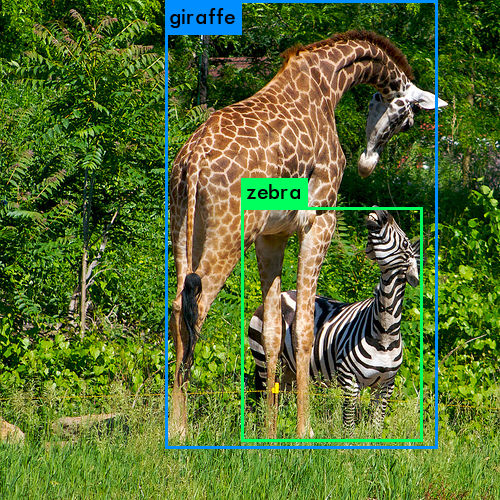

In [5]:
Image(filename='predictions.jpg')  # Make sure the file path is correct


In [6]:
!./darknet detect cfg/yolov2.cfg yolov2.weights data/kite.jpg


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 max          2 x 2 / 2   608 x 608 x  32   ->   304 x 304 x  32
    2 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    3 max          2 x 2 / 2   304 x 304 x  64   ->   152 x 152 x  64
    4 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    5 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    6 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    7 max          2 x 2 / 2   152 x 152 x 128   ->    76 x  76 x 128
    8 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
    9 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   10 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   11 max          2 x 2 / 2    76 x  76 x 256   ->

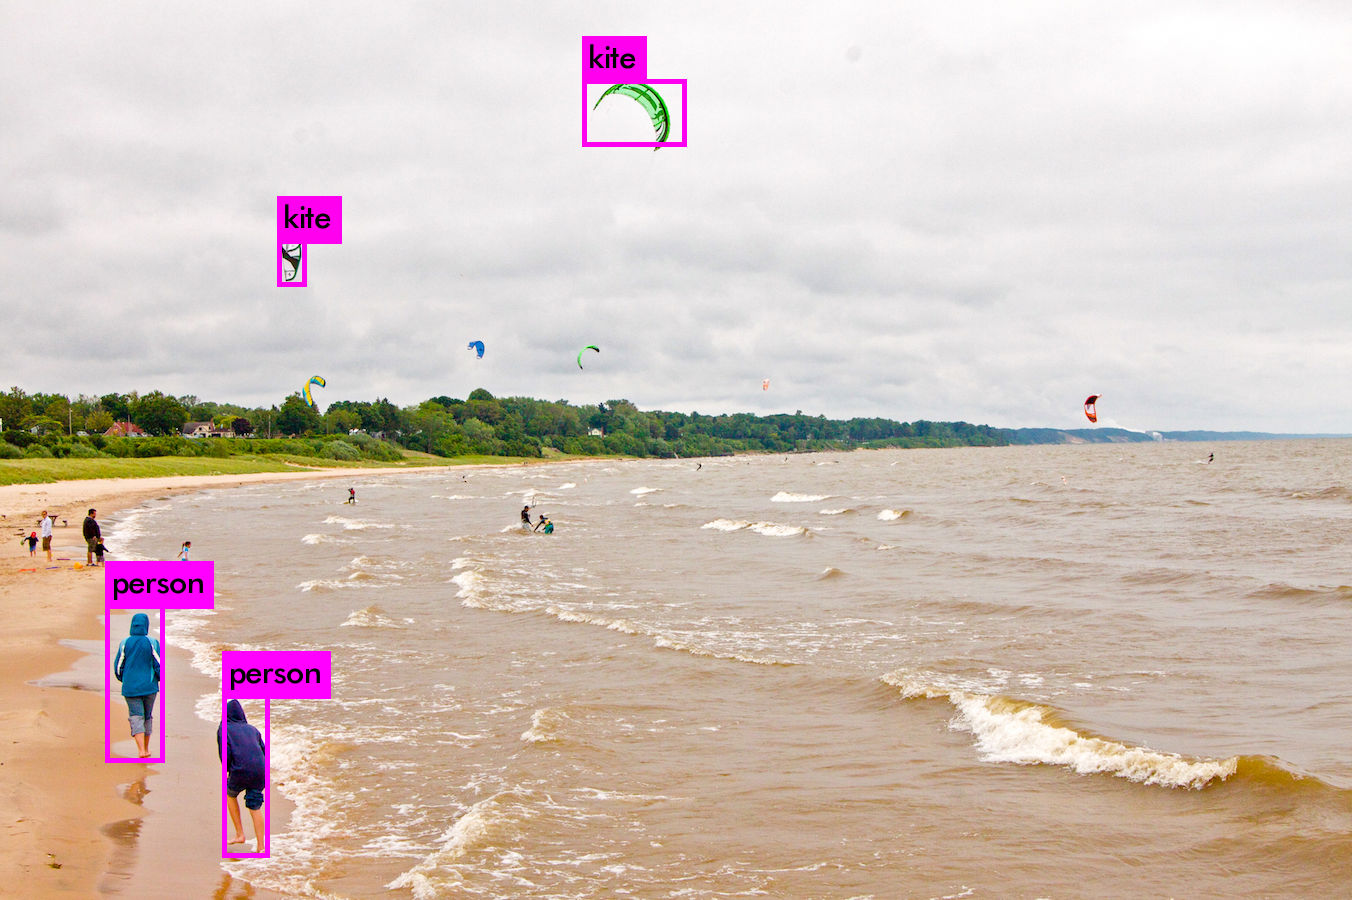

In [7]:
Image(filename='predictions.jpg')  # Make sure the file path is correct
